In [2]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [3]:
# Load the data
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
# Dendrogram for Divisive Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

def divisive_clustering(X, n_clusters):
    labels = np.zeros(X.shape[0])
    current_label = 0
    
    while current_label < n_clusters:
        # Perform agglomerative clustering
        agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
        current_labels = agg_cluster.fit_predict(X)

        # Split the cluster with the largest number of points
        cluster_to_split = np.argmax(np.bincount(current_labels))
        indices_to_split = np.where(current_labels == cluster_to_split)[0]

        labels[indices_to_split] = current_label
        current_label += 1

    return labels

# Perform Divisive Clustering with 5 clusters
divisive_labels = divisive_clustering(X, 5)

# Ensure that the final divisive labels match the length of the original data
assert len(divisive_labels) == len(X), "Length mismatch between divisive labels and data"

# Assign the divisive cluster labels to the dataframe
df['Target_Divisive'] = divisive_labels

# Display the dataframe with divisive cluster labels
print(df)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Target_Divisive  
0                4.0  
1                4.0  
2                4

In [7]:
# Perform Divisive Clustering with 5 clusters
divisive_labels = divisive_clustering(X, 5)

In [8]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

def divisive_clustering(X, n_clusters):
    labels = np.zeros(X.shape[0])
    current_label = 0
    
    while current_label < n_clusters:
        # Perform agglomerative clustering
        agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
        current_labels = agg_cluster.fit_predict(X)

        # Split the cluster with the largest number of points
        cluster_to_split = np.argmax(np.bincount(current_labels))
        indices_to_split = np.where(current_labels == cluster_to_split)[0]

        labels[indices_to_split] = current_label
        current_label += 1

    return labels

# Usage
n_clusters_divisive = 5  # Set the desired number of divisive clusters
divisive_labels = divisive_clustering(X, n_clusters_divisive)
print(divisive_labels)


[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 0. 4. 0. 4. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0.
 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Target_Divisive  
0                0.0  
1                0.0  
2                0

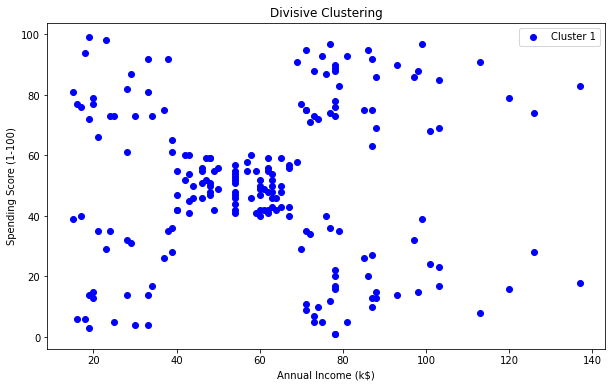

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Load the data
df = pd.read_csv('./Mall_Customers.csv')

# Select the features for clustering
X = df.iloc[:, [3, 4]].values

# Define the divisive clustering function
def divisive_clustering(X, n_clusters):
    labels = np.zeros(X.shape[0])
    current_label = 0
    
    while current_label < n_clusters:
        # Perform agglomerative clustering
        agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
        current_labels = agg_cluster.fit_predict(X)

        # Split the cluster with the largest number of points
        cluster_to_split = np.argmax(np.bincount(current_labels))
        indices_to_split = np.where(current_labels == cluster_to_split)[0]

        labels[indices_to_split] = current_label
        current_label += 1

    return labels

# Perform Divisive Clustering with 1 clusters
n_clusters_divisive = 1
divisive_labels = divisive_clustering(X, n_clusters_divisive)

# Assign divisive cluster labels to the dataframe
df['Target_Divisive'] = divisive_labels

# Display the dataframe with divisive cluster labels
print(df)

# Plot the Divisive Clustering results with blue color
colors = ['blue']  # Ganti warna sesuai keinginan

plt.figure(figsize=(10, 6))
for i in range(n_clusters_divisive):
    plt.scatter(X[divisive_labels == i, 0], X[divisive_labels == i, 1], label=f'Cluster {i + 1}', c=colors)

plt.title('Divisive Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Target_Divisive  
0                1.0  
1                1.0  
2                1

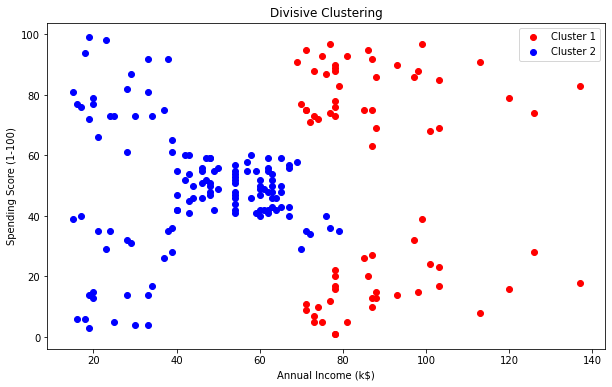

In [14]:

# Select the features for clustering
X = df.iloc[:, [3, 4]].values

# Define the divisive clustering function
def divisive_clustering(X, n_clusters):
    labels = np.zeros(X.shape[0])
    current_label = 0
    
    while current_label < n_clusters:
        # Perform agglomerative clustering
        agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
        current_labels = agg_cluster.fit_predict(X)

        # Split the cluster with the largest number of points
        cluster_to_split = np.argmax(np.bincount(current_labels))
        indices_to_split = np.where(current_labels == cluster_to_split)[0]

        labels[indices_to_split] = current_label
        current_label += 1

    return labels

# Perform Divisive Clustering with 3 clusters
n_clusters_divisive = 2
divisive_labels = divisive_clustering(X, n_clusters_divisive)

# Assign divisive cluster labels to the dataframe
df['Target_Divisive'] = divisive_labels

# Display the dataframe with divisive cluster labels
print(df)

# Plot the Divisive Clustering results with red and blue colors
colors = ['red', 'blue']  # Ganti warna sesuai keinginan

plt.figure(figsize=(10, 6))
for i in range(n_clusters_divisive):
    plt.scatter(X[divisive_labels == i, 0], X[divisive_labels == i, 1], label=f'Cluster {i + 1}', c=colors[i])

plt.title('Divisive Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

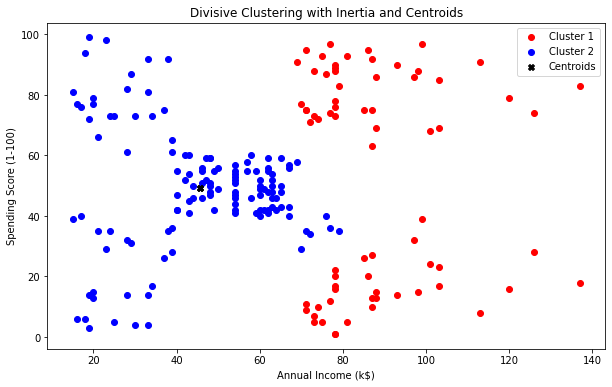

Divisive Inertia: 6712.132508251421


In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('./Mall_Customers.csv')

# Select the features
X = df.iloc[:, [3, 4]].values

def divisive_clustering(X, n_clusters):
    labels = np.zeros(X.shape[0])
    current_label = 0
    centroids = []  # List to store the centroids
    
    while current_label < n_clusters:
        # Perform agglomerative clustering
        agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
        current_labels = agg_cluster.fit_predict(X)

        # Split the cluster with the largest number of points
        cluster_to_split = np.argmax(np.bincount(current_labels))
        indices_to_split = np.where(current_labels == cluster_to_split)[0]

        labels[indices_to_split] = current_label
        current_label += 1

        # Calculate and store the centroid of the split cluster
        centroid = X[indices_to_split].mean(axis=0)
        centroids.append(centroid)

    return labels, np.array(centroids)

def calculate_inertia(X, labels, centroids):
    distances = np.zeros(X.shape[0])
    for i, label in enumerate(labels):
        cluster_center = centroids[int(label)]  # Konversi label menjadi bilangan bulat
        distances[i] = np.linalg.norm(X[i] - cluster_center)
    return np.sum(distances)

# Perform Divisive Clustering with 2 clusters (adjust the number as needed)
n_clusters_divisive = 2
divisive_labels, centroids_divisive = divisive_clustering(X, n_clusters_divisive)

# Ensure that the final divisive labels match the length of the original data
assert len(divisive_labels) == len(X), "Length mismatch between divisive labels and data"

# Calculate divisive inertia
inertia_divisive = calculate_inertia(X, divisive_labels, centroids_divisive)

# Plot the Divisive Clustering results with red and blue colors
colors = ['red', 'blue']  # Ganti warna sesuai keinginan

plt.figure(figsize=(10, 6))
for i in range(n_clusters_divisive):
    plt.scatter(X[divisive_labels == i, 0], X[divisive_labels == i, 1], label=f'Cluster {i + 1}', c=colors[i])

# Plot centroids
plt.scatter(centroids_divisive[:, 0], centroids_divisive[:, 1], marker='X', color='black', label='Centroids')

plt.title('Divisive Clustering with Inertia and Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

print(f'Divisive Inertia: {inertia_divisive}')
